# Ilots EthnoBotaniques - Ilots de Chaleur Urbains

Analyses des données récoltées a fort de l'île Sainte-Hélène été 2023.

Sensor Elitech RC-5 identified by serial numbers (SN)

- SNxxx51 on stone wall of the fort (data_stone)
- SNxxx78 on the part covered by *Parthenocissus quinquefolia* (data_plant)

In [1]:
import requests
import pandas as pd
from geopy.geocoders import Nominatim
import seaborn as sns
import plotly.express as px

date_stamp  = '20230719'
date_format = "%Y-%m-%d %H:%M%S"
data_stone  = f'data/EFE231100351_{date_stamp}.xlsx'
data_plant  = f'data/EFE231100378_{date_stamp}.xlsx'


In [2]:
geolocator = Nominatim(user_agent="hien_foo")
montreal = geolocator.geocode("Montreal, Quebec, Canada")
lat = montreal.latitude
lon = montreal.longitude

print(f"{lat}, {lon}")

45.5031824, -73.5698065


In [3]:
# https://www.thepythoncode.com/article/interactive-weather-plot-with-matplotlib-and-requests

# Get the temperatures of a given location
#
#response = requests.get(f'https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m')
end_date = '2023-07-19'
response = requests.get(f"https://archive-api.open-meteo.com/v1/era5?latitude={lat}&longitude={lon}&start_date=2023-06-29&end_date={end_date}&hourly=temperature_2m")
temperatures = response.json().get('hourly')['temperature_2m']
datetimes = response.json().get('hourly')['time']
df_meteo_mtl = pd.DataFrame({'Dates': datetimes, 'Temperatures': temperatures})
df_meteo_mtl

,Dates,Temperatures
0,2023-06-29T00:00,20.1
1,2023-06-29T01:00,19.7
2,2023-06-29T02:00,19.3
3,2023-06-29T03:00,19.0
4,2023-06-29T04:00,18.8
...,...,...
499,2023-07-19T19:00,NaN
500,2023-07-19T20:00,NaN
501,2023-07-19T21:00,NaN
502,2023-07-19T22:00,NaN


In [15]:
df_meteo_mtl['Dates'] = pd.to_datetime(df_meteo_mtl['Dates'])
print(type(df_meteo_mtl['Dates'][0]))
df_meteo_mtl

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Dates,Temperatures
0,2023-06-29 00:00:00,20.1
1,2023-06-29 01:00:00,19.7
2,2023-06-29 02:00:00,19.3
3,2023-06-29 03:00:00,19.0
4,2023-06-29 04:00:00,18.8
...,...,...
499,2023-07-19 19:00:00,NaN
500,2023-07-19 20:00:00,NaN
501,2023-07-19 21:00:00,NaN
502,2023-07-19 22:00:00,NaN


<Axes: xlabel='Dates'>

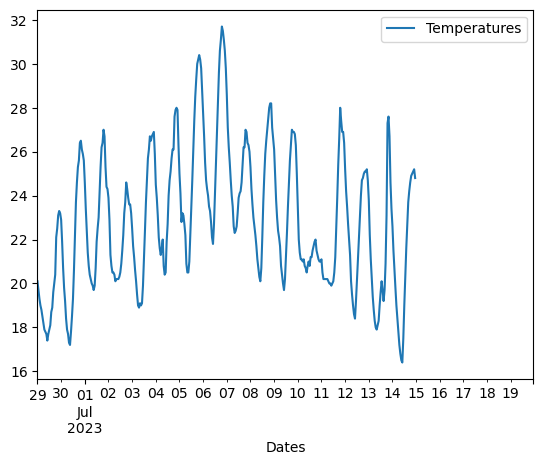

In [5]:
df_meteo_mtl.plot(x='Dates', y='Temperatures')

In [6]:
df78 = pd.read_excel(data_plant, skiprows=28, usecols=[1, 2])
df78.columns = ['Dates', 'Sensor_78']
df78['Dates'] = pd.to_datetime(df78['Dates'])
df78.head()

,Dates,Sensor_78
0,2023-06-28 14:46:48,22.3
1,2023-06-28 15:01:48,21.9
2,2023-06-28 15:16:48,21.3
3,2023-06-28 15:31:48,21.3
4,2023-06-28 15:46:48,20.9


In [7]:
df51 = pd.read_excel(data_stone, skiprows=28, usecols=[1, 2])
df51.columns = ['Dates', 'Sensor_51']
df51['Dates'] = pd.to_datetime(df51['Dates'])
df51.tail()

,Dates,Sensor_51
1997,2023-07-19 10:01:48,28.6
1998,2023-07-19 10:16:48,29.3
1999,2023-07-19 10:31:48,29.9
2000,2023-07-19 10:46:48,30.3
2001,2023-07-19 11:01:48,31.2


In [8]:
df = pd.merge(df78, df51, on='Dates')
df.describe()

,Sensor_78,Sensor_51
count,2002.000000,2002.000000
mean,24.280519,25.453047
std,4.201043,5.395694
min,17.600000,17.600000
25%,21.000000,21.200000
50%,23.300000,23.800000
75%,27.000000,28.575000
max,38.800000,41.700000


<Axes: xlabel='Dates'>

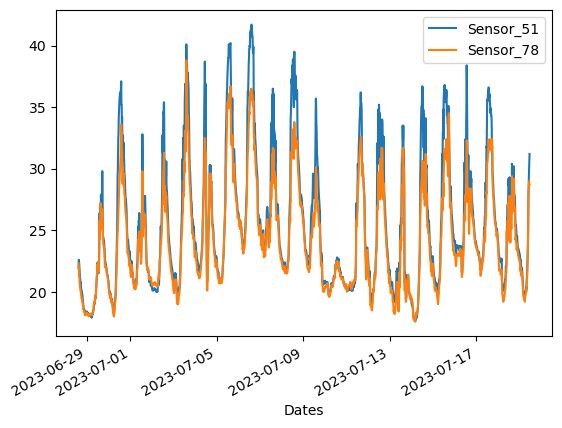

In [9]:
df.plot(x='Dates', y=['Sensor_51', 'Sensor_78'])

In [10]:
fig = px.line(df, x="Dates", y=df.columns,
              title='Temperatures on the wall of the fort')
fig.write_image('temperatures_by_sensors.png')
fig.show()

In [11]:
df1 = pd.concat([df, df_meteo_mtl])
df1

,Dates,Sensor_78,Sensor_51,Temperatures
0,2023-06-28 14:46:48,22.3,21.9,NaN
1,2023-06-28 15:01:48,21.9,22.6,NaN
2,2023-06-28 15:16:48,21.3,22.4,NaN
3,2023-06-28 15:31:48,21.3,22.2,NaN
4,2023-06-28 15:46:48,20.9,21.8,NaN
...,...,...,...,...
499,2023-07-19 19:00:00,NaN,NaN,NaN
500,2023-07-19 20:00:00,NaN,NaN,NaN
501,2023-07-19 21:00:00,NaN,NaN,NaN
502,2023-07-19 22:00:00,NaN,NaN,NaN


In [12]:
fig1 = px.line(df1, x="Dates", y=df1.columns,
              title='Temperatures on the wall of the fort')
fig1.show()

In [13]:
df1['Dates']

0     2023-06-28 14:46:48
1     2023-06-28 15:01:48
2     2023-06-28 15:16:48
3     2023-06-28 15:31:48
4     2023-06-28 15:46:48
              ...        
499   2023-07-19 19:00:00
500   2023-07-19 20:00:00
501   2023-07-19 21:00:00
502   2023-07-19 22:00:00
503   2023-07-19 23:00:00
Name: Dates, Length: 2506, dtype: datetime64[ns]

In [14]:
import plotly.graph_objects as go

gofig = go.Figure(go.Scatter(x=df["Dates"], y=df.columns))

gofig.show()

In [32]:
df_highs = df.loc[df['Sensor_78'] >= 30]
df_highs

,Dates,Sensor_78,Sensor_51
184,2023-06-30 12:46:48,30.0,36.2
185,2023-06-30 13:01:48,30.4,35.9
186,2023-06-30 13:16:48,30.7,35.8
187,2023-06-30 13:31:48,31.2,36.1
188,2023-06-30 13:46:48,32.3,36.6
...,...,...,...
1832,2023-07-17 16:46:48,32.0,34.3
1833,2023-07-17 17:01:48,32.0,33.7
1834,2023-07-17 17:16:48,32.4,32.2
1835,2023-07-17 17:31:48,32.4,31.8


In [37]:
#fig1 = px.violin(df, y=df.columns, x="Dates", color="sex", box=True, points="all",
fig2 = px.violin(df_highs, y=['Sensor_78', 'Sensor_51'], box=True, points='all')
fig2.show()